In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
 

df = pd.read_csv(r'C:\Users\USER\Documents\dsi_team_22\data\raw\pharma_spending_data.csv')


# Dealing with missing values first

In [2]:
# Find the number of unique countries
num_countries = df['LOCATION'].nunique()

# Find the number of unique years
num_years = df['TIME'].nunique()

# Determine the year range of the dataset
year_range = (df['TIME'].min(), df['TIME'].max())

# Find the total number of observations
total_observations = len(df)

# Find the total number of possible observations
potential_observations = num_countries * num_years

# Find the number of missing values
num_missing = potential_observations - total_observations

# Display the results
print("Number of Countries:", num_countries)
print("Number of Years:", num_years)
print("Year Range:", year_range)
print("Total Observations:", total_observations)
print("Total Number of Possible Observations:", potential_observations)
print("Number of Missing Values:", num_missing)

Number of Countries: 36
Number of Years: 47
Year Range: (1970, 2016)
Total Observations: 1036
Total Number of Possible Observations: 1692
Number of Missing Values: 656


In [3]:
#Filter from 2000-2015 for imputation
# List of countries to exclude
excluded_countries = ['RUS', 'TUR', 'GBR', 'NZL', 'ISR']

# Filter the DataFrame for rows between 2010 and 2015, excluding specific countries
df_filter_1 = df[(df['TIME'] >= 2000) & (df['TIME'] <= 2015)& (~df['LOCATION'].isin(excluded_countries))]


In [4]:
# Find the number of unique countries
num_countries = df_filter_1['LOCATION'].nunique()

# Find the number of unique years
num_years = df_filter_1['TIME'].nunique()

# Determine the year range of the dataset
year_range = (df_filter_1['TIME'].min(), df_filter_1['TIME'].max())

# Find the total number of observations
total_observations = len(df_filter_1)

# Find the total number of possible observations
potential_observations = num_countries * num_years

# Find the number of missing values
num_missing = potential_observations - total_observations

# Display the results
print("Number of Countries:", num_countries)
print("Number of Years:", num_years)
print("Year Range:", year_range)
print("Total Observations:", total_observations)
print("Total Number of Possible Observations:", potential_observations)
print("Number of Missing Values:", num_missing)

Number of Countries: 31
Number of Years: 16
Year Range: (2000, 2015)
Total Observations: 474
Total Number of Possible Observations: 496
Number of Missing Values: 22


Pivot Table:
TIME         2000     2001     2002     2003     2004     2005     2006  \
LOCATION                                                                  
AUS       338.665  364.771  373.044  401.302  429.882  432.513  461.821   
AUT       344.082  356.061  385.304  417.087  435.327  445.188  474.834   
BEL           NaN      NaN      NaN  483.535  502.408  512.107  521.218   
CAN       402.054  441.311  478.226  519.989  553.470  592.738  638.701   
CHE       361.001  383.731  395.506  414.972  430.299  440.715  458.412   
CZE       228.095  258.786  282.660  320.790  341.185  360.063  346.049   
DEU       381.455  418.329  447.719  469.542  462.927  512.480  527.646   
DNK       210.487  224.017  250.898  253.303  264.636  266.357  298.291   
ESP       322.041  341.886  375.405  412.778  424.380  439.206  469.511   
EST       110.803  126.176  148.975  157.352  187.682  196.655  225.173   
FIN       285.448  312.574  341.560  358.157  393.582  412.210  403.756   
FRA       42

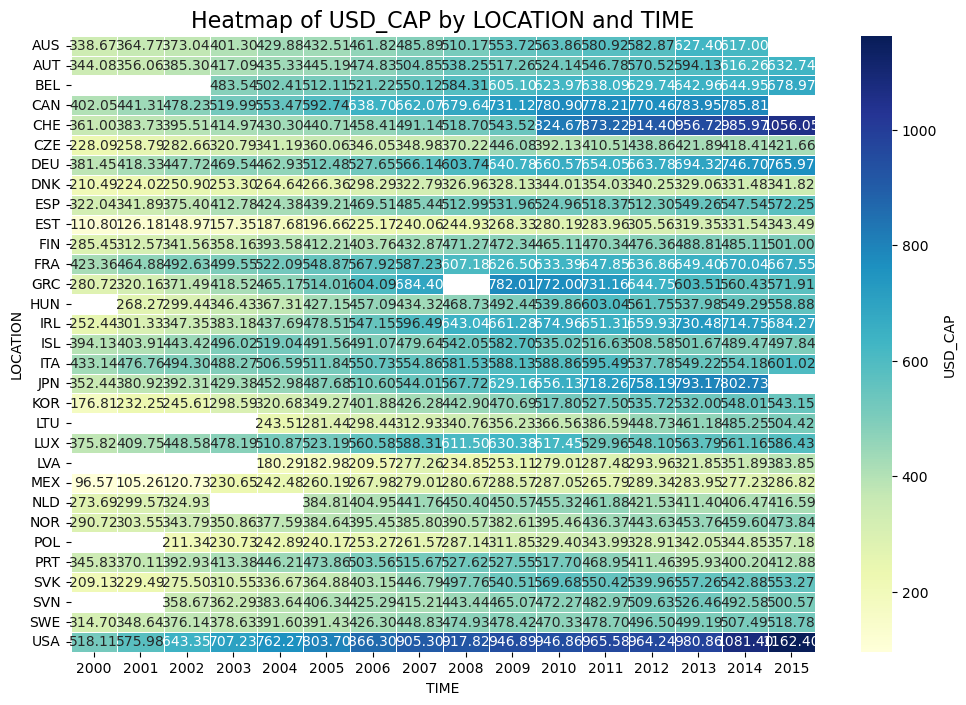

In [5]:

# Step 1: Create a pivot table
pivot_table = df_filter_1.pivot_table(index='LOCATION', columns='TIME', values='USD_CAP', aggfunc='mean')

# Step 2: Display the pivot table
print("Pivot Table:")
print(pivot_table)

# Step 3: Plot a heatmap of the pivot table
plt.figure(figsize=(12, 8))  # Adjust the size of the plot
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5, cbar_kws={'label': 'USD_CAP'})

# Add title
plt.title('Heatmap of USD_CAP by LOCATION and TIME', fontsize=16)

# Show the plot
plt.show()


In [6]:


# Step 1: Filter the DataFrame for rows between 2000 and 2014
df_filtered = df[(df['TIME'] >= 2000) & (df['TIME'] <= 2014)]

# Step 2: Sort the dataframe to ensure the years are ordered
df_filtered = df_filtered.sort_values(by=['LOCATION', 'TIME'])

# Step 3: Impute missing values by taking the mean of the previous 2 years (if available)
def impute_previous_years(group):
    # Iterate through the group (each country) and fill missing values
    for i in range(2, len(group)):
        if pd.isna(group.iloc[i]['USD_CAP']):
            # Take the mean of the two previous years if available
            previous_years = group.iloc[i-2:i]['USD_CAP']
            if previous_years.isna().sum() < 2:  # Ensure at least one value exists
                group.at[group.index[i], 'USD_CAP'] = previous_years.mean()
    return group

# Apply the imputation function to each group (country)
df_filtered_imputed = df_filtered.groupby('LOCATION').apply(impute_previous_years)

# Step 4: Check if there are still missing values
missing_after_imputation = df_filtered_imputed['USD_CAP'].isna().sum()
print(f"Number of missing values after imputation: {missing_after_imputation}")



Number of missing values after imputation: 0


C:\Users\USER\AppData\Local\Temp\ipykernel_22500\758290861.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_filtered_imputed = df_filtered.groupby('LOCATION').apply(impute_previous_years)


In [7]:
# Step 1: Filter the DataFrame for rows between 2004 and 2015
df_filtered_2004_2015 = df[(df['TIME'] >= 2004) & (df['TIME'] <= 2015)]

# Step 2: Exclude specific countries (RUS, TUR, GBR, NZL, ISR)
excluded_countries = ['RUS', 'TUR', 'GBR', 'NZL', 'ISR']
df_filtered2 = df_filtered_2004_2015[~df_filtered_2004_2015['LOCATION'].isin(excluded_countries)]

# Step 3: Check if there are any missing values in the new filtered dataset
missing_after_exclusion = df_filtered2['USD_CAP'].isna().sum()
print(f"Number of missing values in the filtered dataset (2004-2015) after exclusions: {missing_after_exclusion}")

# Display the filtered dataset (optional)
print("\nFiltered dataset (2004-2015) without RUS, TUR, GBR, NZL, ISR:")
print(df_filtered2[['LOCATION', 'TIME', 'USD_CAP']].head())


Number of missing values in the filtered dataset (2004-2015) after exclusions: 0

Filtered dataset (2004-2015) without RUS, TUR, GBR, NZL, ISR:
   LOCATION  TIME  USD_CAP
33      AUS  2004  429.882
34      AUS  2005  432.513
35      AUS  2006  461.821
36      AUS  2007  485.887
37      AUS  2008  510.172


In [8]:
df_filtered2

,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,FLAG_CODES,TOTAL_SPEND
33,AUS,2004,15.656,1.269,429.882,NaN,8652.41
34,AUS,2005,15.218,1.213,432.513,NaN,8821.02
35,AUS,2006,15.276,1.219,461.821,NaN,9558.72
36,AUS,2007,15.201,1.225,485.887,NaN,10119.86
37,AUS,2008,15.412,1.273,510.172,NaN,10840.75
...,...,...,...,...,...,...,...
1030,LTU,2011,26.038,1.692,386.589,NaN,1170.64
1031,LTU,2012,28.942,1.820,448.728,NaN,1340.70
1032,LTU,2013,28.173,1.728,461.178,NaN,1364.02
1033,LTU,2014,27.836,1.724,485.245,NaN,1422.92


In [12]:
# Drop the FLAG_CODES column from the dataframe
df_filtered2_dropped = df_filtered2.drop(columns=['FLAG_CODES'])

# Check if the column was dropped and inspect the data
print(df_filtered2_dropped)


     LOCATION  TIME  PC_HEALTHXP  PC_GDP  USD_CAP  TOTAL_SPEND
33        AUS  2004       15.656   1.269  429.882      8652.41
34        AUS  2005       15.218   1.213  432.513      8821.02
35        AUS  2006       15.276   1.219  461.821      9558.72
36        AUS  2007       15.201   1.225  485.887     10119.86
37        AUS  2008       15.412   1.273  510.172     10840.75
...       ...   ...          ...     ...      ...          ...
1030      LTU  2011       26.038   1.692  386.589      1170.64
1031      LTU  2012       28.942   1.820  448.728      1340.70
1032      LTU  2013       28.173   1.728  461.178      1364.02
1033      LTU  2014       27.836   1.724  485.245      1422.92
1034      LTU  2015       26.784   1.745  504.422      1465.30

[367 rows x 6 columns]


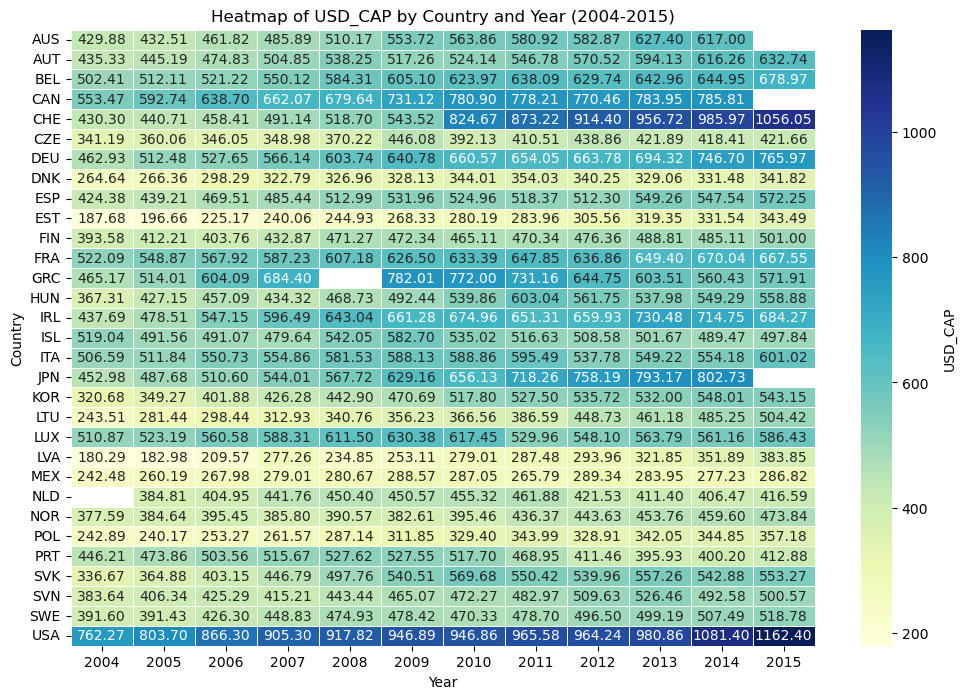

In [14]:
pivot_table = df_filtered2_dropped.pivot_table(index='LOCATION', columns='TIME', values='USD_CAP', aggfunc='mean')

TIME,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
LOCATION,,,,,,,,,,,,
AUS,429.882,432.513,461.821,485.887,510.172,553.724,563.857,580.921,582.874,627.402,616.997,NaN
AUT,435.327,445.188,474.834,504.849,538.253,517.265,524.143,546.783,570.525,594.130,616.256,632.737
BEL,502.408,512.107,521.218,550.120,584.310,605.096,623.970,638.092,629.735,642.958,644.954,678.971
CAN,553.470,592.738,638.701,662.072,679.645,731.121,780.901,778.209,770.464,783.949,785.811,NaN
CHE,430.299,440.715,458.412,491.141,518.695,543.521,824.671,873.221,914.396,956.715,985.969,1056.053
CZE,341.185,360.063,346.049,348.982,370.216,446.076,392.131,410.511,438.857,421.887,418.414,421.663
DEU,462.927,512.480,527.646,566.139,603.742,640.783,660.571,654.053,663.777,694.318,746.704,765.970
DNK,264.636,266.357,298.291,322.787,326.956,328.132,344.010,354.029,340.250,329.056,331.484,341.823
ESP,424.380,439.206,469.511,485.437,512.994,531.957,524.963,518.368,512.297,549.259,547.538,572.253


In [16]:
missing_values_after_imputation = df_filtered2_dropped['USD_CAP'].isna().sum()
print(f"Missing values in 'USD_CAP' after imputation: {missing_values_after_imputation}")


Missing values in 'USD_CAP' after imputation: 0


Doing it again


In [21]:
#  Filter the dataset for the years 2000-2014 for imputation
df_imputation = df[(df['TIME'] >= 2000) & (df['TIME'] <= 2014)]

#  Reset the index for safe operations
df_imputation_reset = df_imputation.reset_index(drop=True)

# Apply imputation after resetting the index
df_imputed = df_imputation_reset.groupby('LOCATION').apply(impute_previous_years)

#  Ensure the index is reset after imputation
df_imputed = df_imputed.reset_index(drop=True)

# Filter the data for 2004-2015, excluding specific countries
excluded_countries = ['RUS', 'TUR', 'GBR', 'NZL', 'ISR']
df_filtered = df_imputed[(df_imputed['TIME'] >= 2004) & (df_imputed['TIME'] <= 2015)]
df_filtered = df_filtered[~df_filtered['LOCATION'].isin(excluded_countries)]

#  Check if there are any missing values
missing_after_imputation = df_filtered[['USD_CAP', 'PC_HEALTHXP', 'PC_GDP', 'TOTAL_SPEND']].isna().sum()
print(f"Missing values after imputation:\n{missing_after_imputation}")


Missing values after imputation:
USD_CAP        0
PC_HEALTHXP    0
PC_GDP         0
TOTAL_SPEND    0
dtype: int64


C:\Users\USER\AppData\Local\Temp\ipykernel_22500\1843799209.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_imputed = df_imputation_reset.groupby('LOCATION').apply(impute_previous_years)


In [23]:
# Step 1: Filter the dataset for the years 2000-2014 for imputation
df_imputation = df[(df['TIME'] >= 2000) & (df['TIME'] <= 2014)]

# Step 2: Reset the index for safe operations
df_imputation_reset = df_imputation.reset_index(drop=True)

# Step 3: Apply imputation after resetting the index
df_imputed = df_imputation_reset.groupby('LOCATION').apply(impute_previous_years)

# Step 4: Reset the index after imputation
df_imputed = df_imputed.reset_index(drop=True)

# Step 5: Filter the data for 2004-2015, excluding specific countries
excluded_countries = ['RUS', 'TUR', 'GBR', 'NZL', 'ISR']
df_filtered = df_imputed[(df_imputed['TIME'] >= 2004) & (df_imputed['TIME'] <= 2015)]
df_filtered = df_filtered[~df_filtered['LOCATION'].isin(excluded_countries)]

# Step 6: Drop the 'FLAG_CODES' column from the filtered DataFrame
df_filtered = df_filtered.drop(columns=['FLAG_CODES'])

# Step 7: Check if there are any missing values
missing_after_imputation = df_filtered[['USD_CAP', 'PC_HEALTHXP', 'PC_GDP', 'TOTAL_SPEND']].isna().sum()
print(f"Missing values after imputation:\n{missing_after_imputation}")


Missing values after imputation:
USD_CAP        0
PC_HEALTHXP    0
PC_GDP         0
TOTAL_SPEND    0
dtype: int64


C:\Users\USER\AppData\Local\Temp\ipykernel_22500\113851270.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_imputed = df_imputation_reset.groupby('LOCATION').apply(impute_previous_years)


In [32]:
# Updated function to impute missing values using the previous 3 years of data if available
def impute_previous_years(group):
    for column in ['USD_CAP', 'PC_HEALTHXP', 'PC_GDP', 'TOTAL_SPEND']:
        for i in range(1, len(group)):
            if pd.isna(group.iloc[i][column]):  # If the current value is NaN
                # Look back at the previous 3 years for imputation
                previous_years = group.iloc[max(i-3, 0):i][column]  # Look at the previous three years (max ensures no out of bounds)
                # Impute with the mean of the available data from the previous years
                group.iloc[i, group.columns.get_loc(column)] = previous_years.mean()
    return group

# Step 1: Filter the dataset for the years 2000-2014 for imputation
df_imputation = df[(df['TIME'] >= 2000) & (df['TIME'] <= 2014)]

# Step 2: Reset the index for safe operations
df_imputation_reset = df_imputation.reset_index(drop=True)

# Step 3: Apply imputation after resetting the index
df_imputed = df_imputation_reset.groupby('LOCATION').apply(impute_previous_years)

# Step 4: Reset the index after imputation
df_imputed = df_imputed.reset_index(drop=True)

# Step 5: Filter the data for 2004-2015, excluding specific countries
excluded_countries = ['RUS', 'TUR', 'GBR', 'NZL', 'ISR']
df_filtered = df_imputed[(df_imputed['TIME'] >= 2004) & (df_imputed['TIME'] <= 2015)]
df_filtered = df_filtered[~df_filtered['LOCATION'].isin(excluded_countries)]

# Step 6: Drop the 'FLAG_CODES' column from the filtered DataFrame
df_filtered = df_filtered.drop(columns=['FLAG_CODES'])

# Step 7: Check if there are any missing values
missing_after_imputation = df_filtered[['USD_CAP', 'PC_HEALTHXP', 'PC_GDP', 'TOTAL_SPEND']].isna().sum()
print(f"Missing values after imputation:\n{missing_after_imputation}")


Missing values after imputation:
USD_CAP        0
PC_HEALTHXP    0
PC_GDP         0
TOTAL_SPEND    0
dtype: int64


C:\Users\USER\AppData\Local\Temp\ipykernel_22500\1630045877.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_imputed = df_imputation_reset.groupby('LOCATION').apply(impute_previous_years)


In [30]:
# Set pandas to display all rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Adjust the width of the display
pd.set_option('display.max_colwidth', None)  # Adjust the max column width

# Display the entire dataset
print(df_filtered)

    LOCATION  TIME  PC_HEALTHXP  PC_GDP   USD_CAP  TOTAL_SPEND
4        AUS  2004       15.656   1.269   429.882      8652.41
5        AUS  2005       15.218   1.213   432.513      8821.02
6        AUS  2006       15.276   1.219   461.821      9558.72
7        AUS  2007       15.201   1.225   485.887     10119.86
8        AUS  2008       15.412   1.273   510.172     10840.75
9        AUS  2009       15.535   1.334   553.724     12011.21
10       AUS  2010       15.630   1.324   563.857     12422.76
11       AUS  2011       15.311   1.315   580.921     12977.79
12       AUS  2012       15.308   1.336   582.874     13247.71
13       AUS  2013       14.989   1.320   627.402     14503.87
14       AUS  2014       14.386   1.306   616.997     14475.18
19       AUT  2004       13.410   1.294   435.327      3557.48
20       AUT  2005       13.325   1.277   445.188      3662.93
21       AUT  2006       13.370   1.268   474.834      3926.23
22       AUT  2007       13.605   1.289   504.849      

In [31]:
# Step 1: Filter the data for the year 2004 and LOCATION 'NLD'
df_2004_nld = df_filtered[(df_filtered['TIME'] == 2004) & (df_filtered['LOCATION'] == 'NLD')]

# Step 2: Display the filtered data
print(df_2004_nld)


Empty DataFrame
Columns: [LOCATION, TIME, PC_HEALTHXP, PC_GDP, USD_CAP, TOTAL_SPEND]
Index: []


Use rolling imputation to fix the missing values isse

In [36]:
# Step 1: Filter the dataset for the years 2000-2014 for imputation
df_imputation = df[(df['TIME'] >= 2000) & (df['TIME'] <= 2014)]

# Step 2: Reset the index for safe operations
df_imputation_reset = df_imputation.reset_index(drop=True)

# Step 3: Define the imputation function
def impute_previous_years_rolling(df_group):
    for col in ['PC_HEALTHXP', 'PC_GDP', 'USD_CAP', 'TOTAL_SPEND']:  # Adjust this list to your columns
        for idx, row in df_group.iterrows():
            if pd.isna(row[col]):  # Only impute if the value is NaN
                previous_years = df_group[df_group['TIME'] < row['TIME']].sort_values('TIME', ascending=False)
                if not previous_years.empty:
                    for prev_idx, prev_row in previous_years.iterrows():
                        if not pd.isna(prev_row[col]):
                            df_group.at[idx, col] = prev_row[col]
                            break
    return df_group

# Step 4: Apply the imputation after resetting the index
df_imputed = df_imputation_reset.groupby('LOCATION').apply(impute_previous_years_rolling)

# Step 5: Reset the index after imputation
df_imputed = df_imputed.reset_index(drop=True)

# Step 6: Filter the data for 2004-2015, excluding specific countries
excluded_countries = ['RUS', 'TUR', 'GBR', 'NZL', 'ISR']
df_filtered = df_imputed[(df_imputed['TIME'] >= 2004) & (df_imputed['TIME'] <= 2015)]
df_filtered = df_filtered[~df_filtered['LOCATION'].isin(excluded_countries)]

# Step 7: Drop the 'FLAG_CODES' column from the filtered DataFrame
df_filtered = df_filtered.drop(columns=['FLAG_CODES'])



# Step 9: Check if there are any missing values
missing_after_imputation = df_filtered[['USD_CAP', 'PC_HEALTHXP', 'PC_GDP', 'TOTAL_SPEND']].isna().sum()
print(f"Missing values after imputation:\n{missing_after_imputation}")


Missing values after imputation:
USD_CAP        0
PC_HEALTHXP    0
PC_GDP         0
TOTAL_SPEND    0
dtype: int64


C:\Users\USER\AppData\Local\Temp\ipykernel_22500\1019037129.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_imputed = df_imputation_reset.groupby('LOCATION').apply(impute_previous_years_rolling)


In [37]:
# Step 8: Check if 'NLD' has data for 2003 and 2004 after imputation
df_2003_2004_nld_imputed = df_imputed[(df_imputed['LOCATION'] == 'NLD') & (df_imputed['TIME'].isin([2003, 2004]))]
print("2003 and 2004 Data for NLD after imputation:")
print(df_2003_2004_nld_imputed)

2003 and 2004 Data for NLD after imputation:
Empty DataFrame
Columns: [LOCATION, TIME, PC_HEALTHXP, PC_GDP, USD_CAP, FLAG_CODES, TOTAL_SPEND]
Index: []


In [38]:
# Example for testing the imputation for a few rows manually:
def test_impute_for_nld():
    df_nld_test = df[(df['LOCATION'] == 'NLD') & (df['TIME'] >= 2000) & (df['TIME'] <= 2004)]
    print("Data for NLD before imputation:")
    print(df_nld_test)
    # Apply the imputation function manually for this small test case
    df_nld_imputed_test = impute_previous_years(df_nld_test)
    print("Data for NLD after imputation:")
    print(df_nld_imputed_test)

# Call the test function
test_impute_for_nld()


Data for NLD before imputation:
    LOCATION  TIME  PC_HEALTHXP  PC_GDP  USD_CAP FLAG_CODES  TOTAL_SPEND
649      NLD  2000       12.285   0.867  273.687        NaN      4358.61
650      NLD  2001       12.232   0.910  299.575        NaN      4807.03
651      NLD  2002       12.018   0.956  324.925        NaN      5247.19
Data for NLD after imputation:
    LOCATION  TIME  PC_HEALTHXP  PC_GDP  USD_CAP FLAG_CODES  TOTAL_SPEND
649      NLD  2000       12.285   0.867  273.687        NaN      4358.61
650      NLD  2001       12.232   0.910  299.575        NaN      4807.03
651      NLD  2002       12.018   0.956  324.925        NaN      5247.19


In [39]:
def impute_previous_years_v2(group):
    # Sort the group by TIME to ensure chronological order
    group = group.sort_values(by='TIME')
    
    # Loop through each row and check if the value is missing
    for col in ['PC_HEALTHXP', 'PC_GDP', 'USD_CAP', 'TOTAL_SPEND']:
        for i in range(1, len(group)):  # Start from the second row onward
            if pd.isna(group[col].iloc[i]):  # If current year has missing value
                # Look back up to 3 years before and fill in the missing value
                for j in range(1, 4):  # Look back 1, 2, or 3 years
                    if i - j >= 0 and not pd.isna(group[col].iloc[i - j]):
                        group[col].iloc[i] = group[col].iloc[i - j]  # Fill the missing value
                        break  # Stop once a valid value is found
    return group

# Apply this improved function across all countries
df_imputed_v2 = df_imputation_reset.groupby('LOCATION').apply(impute_previous_years_v2)


C:\Users\USER\AppData\Local\Temp\ipykernel_22500\4047743642.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_imputed_v2 = df_imputation_reset.groupby('LOCATION').apply(impute_previous_years_v2)


In [40]:
# Check if NLD data has been imputed for 2003 and 2004
df_nld_imputed_2003_2004 = df_imputed_v2[(df_imputed_v2['LOCATION'] == 'NLD') & (df_imputed_v2['TIME'].isin([2003, 2004]))]
print("Imputed Data for NLD in 2003 and 2004:")
print(df_nld_imputed_2003_2004)


Imputed Data for NLD in 2003 and 2004:
Empty DataFrame
Columns: [LOCATION, TIME, PC_HEALTHXP, PC_GDP, USD_CAP, FLAG_CODES, TOTAL_SPEND]
Index: []
